# 210968090_Santhosh_Darla_IDA_Week3_EX-2

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('bollywood.csv')

In [4]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


## 1. How many records are present in the dataset?



In [5]:
len(df['SlNo'])

149

In [6]:
df.shape[0]

149

In [7]:
df['Genre'].count()

149

## 2. How many movies got released in each genre? Sort number of releases in each genre in descending order.
        

In [8]:
import numpy as np
df['Genre'] = df['Genre'].str.strip()
df.groupby('Genre').count().SlNo.sort_values(ascending = False)

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: SlNo, dtype: int64

## 3. Which genre had highest number of releases?

In [9]:
df['Genre'].value_counts().nlargest(1)

Comedy    36
Name: Genre, dtype: int64


## 4. How many movies in each genre got released in different release times like long weekend, festive season, etc.

In [61]:
pd.crosstab(df['Genre'],df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


## 5. Which month of the year, maximum number movie releases are seen?

In [11]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [12]:
df['month'] = df['Release Date'].dt.month

In [13]:
df['month'].value_counts().nlargest(1)

1    20
Name: month, dtype: int64

## 6.Which month of the year typically sees most releases of high budgeted movies, that  is,            movies with budget of 25 crore or more?


In [14]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['month'] = df['Release Date'].dt.month
df['month'][df['Budget'] >=25].value_counts().nlargest(1)

2    9
Name: month, dtype: int64

## 7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return        on investment (ROI) as (BoxOfficeCollection – Budget) / Budget



In [15]:
df['ROI'] = (df['BoxOfficeCollection']-df['Budget'])/df['Budget']

In [16]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,ROI
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,1.888889
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,0.200000
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,-0.600000
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.950000
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,-0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2,1.000000
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,3,1.469231
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3,-0.625000
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3,1.378000


In [20]:
df['MovieName'][df['ROI'].nlargest(10).index]

64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object

## Q8  Do the movies have higher ROI if they get released on festive seasons or long                       weekend? Calculate the average ROI for different release times

In [23]:
print("Average ROI for different release times")
df.groupby('ReleaseTime').ROI.mean().nlargest()

Average ROI for different release times


ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: ROI, dtype: float64

In [24]:
print("Movies that are released in the long weekend have more ROI")

Movies that are released in the long weekend have more ROI


## Q9 Is there a correlation between box office collection and YouTube likes? Is the                   correlation positive or negative? 

In [27]:
df['BoxOfficeCollection'].corr(df['YoutubeLikes'])

0.6825165877731297

In [30]:
print("Nearly high degree of Positive correlation")

Nearly high degree of Positive correlation


## Q10 Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare. 

In [32]:
df.groupby('Genre').sum().YoutubeLikes.nlargest(1)

Genre
Action    401873
Name: YoutubeLikes, dtype: int64

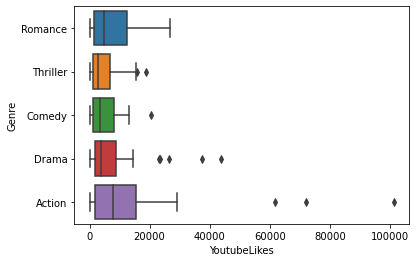

In [36]:
import seaborn as sns
sns.boxplot(x=df['YoutubeLikes'],y=df['Genre'])

## Q11 Which of the variables among Budget, BoxOfficeCollection, YoutubeView,YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap. 

Text(0.5, 1.0, 'HEAT MAP')

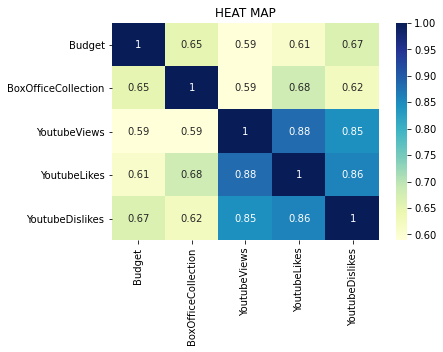

In [39]:
sns.heatmap(df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr(),cmap='YlGnBu',annot=True).set_title("HEAT MAP")

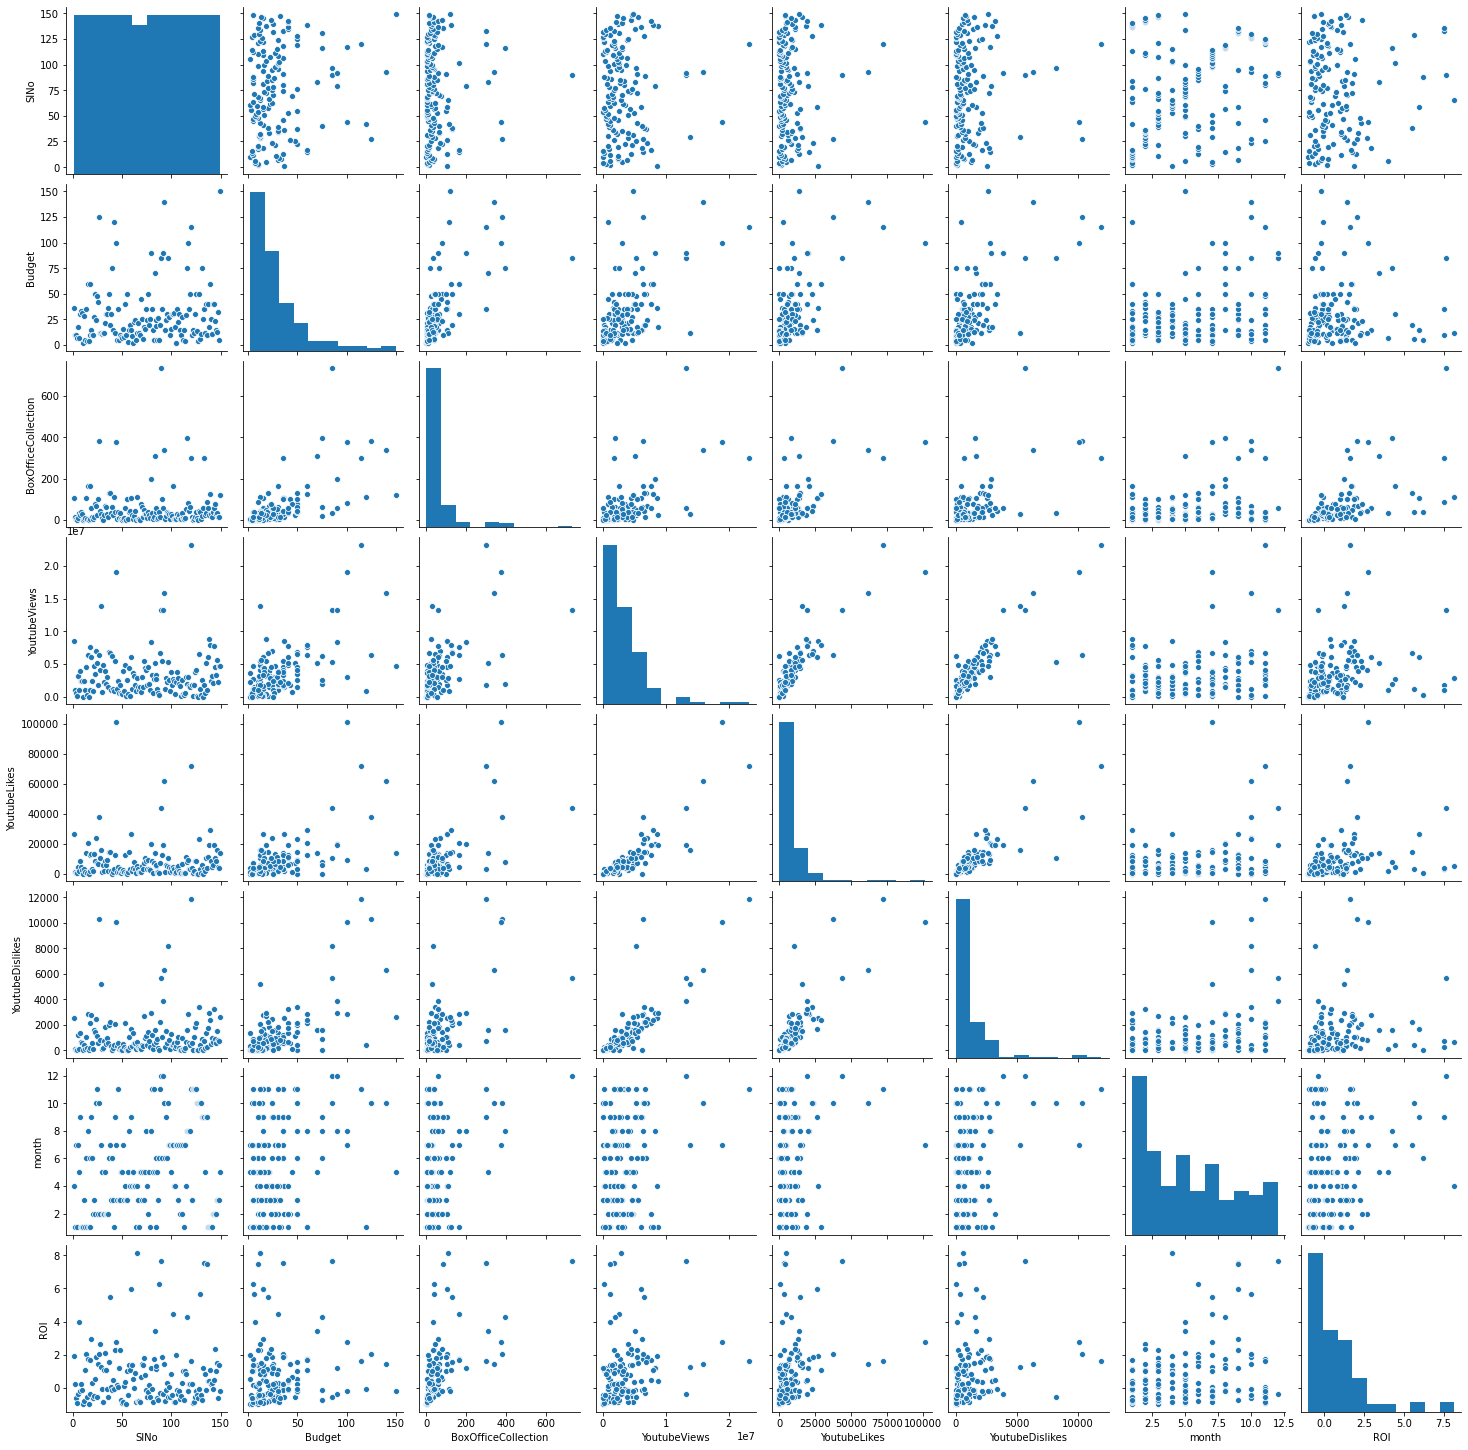

In [40]:
sns.pairplot(df)

## Q12  During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.

Text(0.5, 1.0, 'Bar Graph')

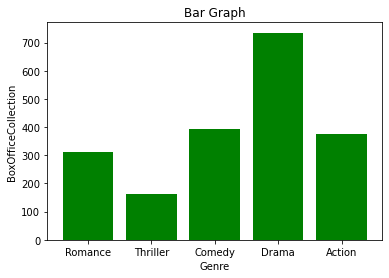

In [52]:
import matplotlib.pyplot as plt
plt.bar(df['Genre'],df['BoxOfficeCollection'],color="green")
plt.xlabel("Genre")
plt.ylabel("BoxOfficeCollection")
plt.title("Bar Graph")

## Q13 Visualize the Budget and Box office collection based on Genre 

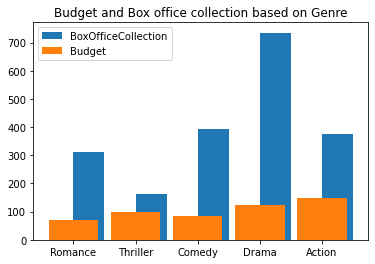

In [58]:
plt.bar(df['Genre'],df['BoxOfficeCollection'],align='edge',label='BoxOfficeCollection',width=0.5)
plt.bar(df['Genre'],df['Budget'],label='Budget')
plt.title('Budget and Box office collection based on Genre')
plt.legend() 


## Q14 Find the distribution of movie budget for every Genre. 

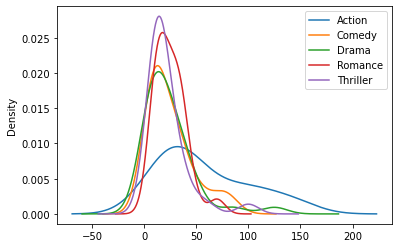

In [59]:
df.groupby('Genre').Budget.plot(kind='density')
plt.legend()

## Q15 During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph

,Release Date
2014,70
2013,67
2015,12


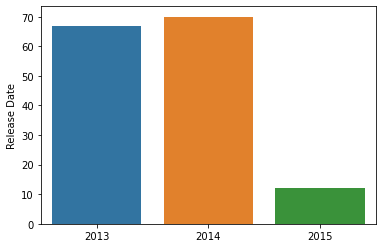

In [60]:
df['Release Date']=pd.to_datetime(df['Release Date'])
data=pd.DataFrame(df['Release Date'].dt.year.value_counts())
sns.barplot(x=data.index,y=data['Release Date'])
data